# Why NumPy?
This chapter, along with the next chapter (about Pandas), outlines techniques for effectively loading, storing, and manipulating in-memory data in Python. The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else. Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

For example, images–particularly digital images–can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area. Sound clips can be thought of as one-dimensional arrays of intensity versus time. Text can be converted in various ways into numerical representations, perhaps binary digits representing the frequency of certain words or pairs of words. No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers. 

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science. We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package, and the Pandas package (discussed in next Lesson).

NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python's built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size. NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

In order to learn about how memory is efficiently handled using NumPy arrays, check out this [guide](https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/numpy/02.01-Understanding-Data-Types.ipynb).

python integer:
![](https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/numpy/figures/cint_vs_pyint.png)

numpy array vs python list:
![](https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/numpy/figures/array_vs_list.png)

# Getting Started
When using an Anaconda environment or this Google colab notebook, numpy comes pre-installed. 

Simply try out the following command:

In [ ]:
import numpy

Or as most people do, import `numpy` using an alias `np`:

In [ ]:
import numpy as np

If an error occurs, that means you need to install numpy. To do this, simply use `pip` or `conda` to install `numpy`.

# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas (next Chapter) are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5]) # 1D array
empty = np.array([])
print(arr)
print(empty)
print(type(arr))

[1 2 3 4 5]
[]
<class 'numpy.ndarray'>


In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]]) # 2D array (matrix)
print(arr)

[[1 2 3]
 [4 5 6]]


In [ ]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(arr)

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


## NumPy Array Attributes (properties)


First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [ ]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [ ]:
x1

array([5, 0, 3, 3, 7, 9])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [ ]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Another useful attribute is the ``dtype``, the data type of the array (which we discussed previously in [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)):

In [ ]:
print("dtype:", x3.dtype)

dtype: int64


Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [ ]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [ ]:
x1

array([5, 0, 3, 3, 7, 9])

In [ ]:
x1[0]

5

In [ ]:
x1[4]

7

To index from the end of the array, you can use negative indices:

In [ ]:
x1[-1]

9

In [ ]:
x1[-2]

7

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [ ]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [ ]:
x2[0, 0]

3

In [ ]:
x2[2, 0]

1

In [ ]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [ ]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [ ]:
x1[0] = 3.14159    # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

### One-dimensional subarrays

In [ ]:
x = np.arange(10)   # range(10)  vs  np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [ ]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [ ]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [ ]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [ ]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [ ]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [ ]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [ ]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [ ]:
x2[:, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Finally, subarray dimensions can even be reversed together:

In [ ]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [ ]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [ ]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [ ]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [ ]:
print(x2[0])  # equivalent to x2[0, :]

[12  5  2  4]


In [ ]:
print(x3)

[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


In [ ]:
print(x3[:2,:2,:])

[[[8 1 5 9 8]
  [9 4 3 0 3]]

 [[0 1 9 9 0]
  [4 7 3 2 7]]]


### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

In [ ]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


Let's extract a $2 \times 2$ subarray from this:

In [ ]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [ ]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [ ]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


If we now modify this subarray, the original array is not touched:

In [ ]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [ ]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [ ]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid) # 2D (3,3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. 
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [ ]:
x = np.array([1, 2, 3]) # 1D (3,)
print(x.shape)
# row vector via reshape
y = x.reshape((1, 3))       # 2D (1,3)
print(y.shape)
print(x)
print(y)

(3,)
(1, 3)
[1 2 3]
[[1 2 3]]


In [ ]:
print(x)

# row vector via newaxis
print(x[np.newaxis, :])       # 2D (1,3)

[1 2 3]
[[1 2 3]]


In [ ]:
# column vector via reshape
x.reshape((3, 1))      # 2D (3,1)

array([[1],
       [2],
       [3]])

In [ ]:
# column vector via newaxis
x[:, np.newaxis] # 2D (3,1)

array([[1],
       [2],
       [3]])

In [ ]:
u = np.arange(6)
print(u)

print(u.reshape((1,6)))
print(u[np.newaxis,:])

print(u.reshape((2,3)))
#print(u)

[0 1 2 3 4 5]
[[0 1 2 3 4 5]]
[[0 1 2 3 4 5]]
[[0 1 2]
 [3 4 5]]


We will see this type of transformation often throughout the remainder of the book.

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [ ]:
x = np.array([1, 2, 3]) # 1D (3,)
y = np.array([3, 2, 1]) # 1D (3,)
o = np.concatenate([x, y]) 
print(o)

[1 2 3 3 2 1]


You can also concatenate more than two arrays at once:

In [ ]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


It can also be used for two-dimensional arrays:

In [ ]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
print(grid)

[[1 2 3]
 [4 5 6]]


In [ ]:
# concatenate along the first axis
grid2 = np.concatenate([grid, grid])
print(grid2)
print(grid2.shape, grid.shape)

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
(4, 3) (2, 3)


In [ ]:
# concatenate along the second axis (zero-indexed)
grid3 = np.concatenate([grid, grid], axis=1)
print(grid3, grid3.shape, grid.shape )

[[1 2 3 1 2 3]
 [4 5 6 4 5 6]] (2, 6) (2, 3)


For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [ ]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
vstacked = np.vstack([x, grid])
print(vstacked)

[[1 2 3]
 [9 8 7]
 [6 5 4]]


In [ ]:
# horizontally stack the arrays
y = np.array([[99],
              [99]]) 
print(y.shape)
hstacked = np.hstack([grid, y])
print(hstacked)

(2, 1)
[[ 9  8  7 99]
 [ 6  5  4 99]]


Similary, ``np.dstack`` will stack arrays along the third axis.

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Notice that *N* split-points, leads to *N + 1* subarrays.
The related functions ``np.hsplit`` and ``np.vsplit`` are similar:

In [ ]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Similarly, ``np.dsplit`` will split arrays along the third axis.

# Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world.
Namely, it provides an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.
The key to making it fast is to use **vectorized** operations, generally implemented through NumPy's **universal functions** (ufuncs).
This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient.
It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

## The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly.
This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran.
Recently there have been various attempts to address this weakness: well-known examples are the [PyPy](http://pypy.org/) project, a just-in-time compiled implementation of Python; the [Cython](http://cython.org) project, which converts Python code to compilable C code; and the [Numba](http://numba.pydata.org/) project, which converts snippets of Python code to fast LLVM bytecode.
Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.
For example, imagine we have an array of values and we'd like to compute the reciprocal of each.
A straightforward approach might look like this:

In [ ]:
import numpy as np
np.random.seed(0) # for reproducibility

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print(values)
print(compute_reciprocals(values))

[6 1 4 4 8]
[0.16666667 1.         0.25       0.25       0.125     ]


This implementation probably feels fairly natural to someone from, say, a C or Java background.
But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so!
We'll benchmark this with IPython's ``%timeit`` magic:

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 5: 3.2 s per loop


It takes several seconds to compute these million operations and to store the result!
When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow.
It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop.
Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type.
If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a *vectorized* operation.
This can be accomplished by simply performing an operation on the array, which will then be applied to each element.
This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [ ]:
print(compute_reciprocals(values))
print(1.0 / values)         # note how the array 'values' was treated as a normal scalar variable

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [ ]:
%timeit (1.0 / big_array)

1000 loops, best of 5: 2.03 ms per loop


Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.
Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [ ]:
print(np.arange(5))
print(np.arange(1, 6))
print(np.arange(5) / np.arange(1, 6))

[0 1 2 3 4]
[1 2 3 4 5]
[0.         0.5        0.66666667 0.75       0.8       ]


And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [ ]:
x = np.arange(9).reshape((3, 3))
print(x)
print(2 ** x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  1   2   4]
 [  8  16  32]
 [ 64 128 256]]


Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size.
Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: *unary ufuncs*, which operate on a single input, and *binary ufuncs*, which operate on two inputs.
We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:

In [ ]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # integer (floor) division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [ ]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [ ]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [ ]:
np.add(x, 2)    # x + 2 

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Additionally there are Boolean/bitwise operators; we will explore these in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb).

### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [ ]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is ``np.absolute``, which is also available under the alias ``np.abs``:

In [ ]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [ ]:
np.abs(x)

array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [ ]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions.
We'll start by defining an array of angles:

In [ ]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [ ]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.
Inverse trigonometric functions are also available:

In [ ]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [ ]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [ ]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When ``x`` is very small, these functions give more precise values than if the raw ``np.log`` or ``np.exp`` were to be used.

# Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [ ]:
import numpy as np

In [ ]:
a = np.array([0, 1, 2]) # 1D (3,)
b = np.array([5, 5, 5]) # 1D (3,)
print(a + b)

[5 6 7]


Broadcasting allows these types of binary operations to be performed on arrays of **different sizes**–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [ ]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [ ]:
M = np.ones((3, 3))   # np.zeros...
print(M)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
print(a) # 1D (3,)
print(M) # 2D (3,3)
Ma = M + a
print(Ma) # 2D (3,3)

[0 1 2]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [ ]:
a = np.arange(3) 
b = np.arange(3)[:, np.newaxis]

print(a) # 1D (3,)
print(b) # 2D (3,1)

[0 1 2]
[[0]
 [1]
 [2]]


In [ ]:
print(a + b) # 2D (3,3)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure:

![Broadcasting Visual](https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/numpy/figures/02.05-broadcasting.png)

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)
print(a)
print(M)

[0 1 2]
[[1. 1. 1.]
 [1. 1. 1.]]


Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [ ]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [ ]:
M + a

ValueError: ignored

Note the potential confusion here: you could imagine making ``a`` and ``M`` compatible by, say, padding ``a``'s shape with ones on the right rather than the left.
But this is not how the broadcasting rules work!
That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.
If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the ``np.newaxis`` keyword introduced in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)):

In [ ]:
a[:, np.newaxis].shape

(3, 1)

In [ ]:
print(a)
print(M)
print(a[:, np.newaxis])
C = M + a[:, np.newaxis]
print(C)

[0 1 2]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0]
 [1]
 [2]]
[[1. 1.]
 [2. 2.]
 [3. 3.]]


In [ ]:
print(a)
print(M)
print(a.reshape((3,1)))
C2 = M + a.reshape((3,1))
print(C2)

[0 1 2]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0]
 [1]
 [2]]
[[1. 1.]
 [2. 2.]
 [3. 3.]]


Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

Broadcasting operations form the core of many examples we'll see throughout data science problems.
We'll now take a look at a couple simple examples of where they can be useful.

### Centering an array

In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability.
One commonly seen example is when centering an array of data.
Imagine you have an array of 10 observations, each of which consists of 3 values.
Using the standard convention (see [Data Representation in Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb#Data-Representation-in-Scikit-Learn)), we'll store this in a $10 \times 3$ array:

In [ ]:
X = np.random.random((10, 3))
print(X)

[[0.87884932 0.09785878 0.12446372]
 [0.42253024 0.39034562 0.35621026]
 [0.99663284 0.55823601 0.84371046]
 [0.78986544 0.99105381 0.28137886]
 [0.01765187 0.6559858  0.61765416]
 [0.17973144 0.84749539 0.46820265]
 [0.97459109 0.60303019 0.31209932]
 [0.63006004 0.93992516 0.36891447]
 [0.86732999 0.45108972 0.67813826]
 [0.82235473 0.21737642 0.21458453]]


We can compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [ ]:
Xmean = X.mean(axis=0)
Xmean

array([0.6579597 , 0.57523969, 0.42653567])

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [ ]:
X_centered = X - Xmean
print(X.shape)
print(Xmean.shape)
print(X_centered.shape)
print(X)
print(X_centered)

(10, 3)
(3,)
(10, 3)
[[0.87884932 0.09785878 0.12446372]
 [0.42253024 0.39034562 0.35621026]
 [0.99663284 0.55823601 0.84371046]
 [0.78986544 0.99105381 0.28137886]
 [0.01765187 0.6559858  0.61765416]
 [0.17973144 0.84749539 0.46820265]
 [0.97459109 0.60303019 0.31209932]
 [0.63006004 0.93992516 0.36891447]
 [0.86732999 0.45108972 0.67813826]
 [0.82235473 0.21737642 0.21458453]]
[[ 0.22088962 -0.47738091 -0.30207195]
 [-0.23542946 -0.18489407 -0.07032541]
 [ 0.33867314 -0.01700368  0.41717479]
 [ 0.13190574  0.41581412 -0.14515681]
 [-0.64030783  0.08074611  0.19111849]
 [-0.47822826  0.2722557   0.04166698]
 [ 0.31663139  0.0277905  -0.11443635]
 [-0.02789966  0.36468547 -0.0576212 ]
 [ 0.20937029 -0.12414997  0.2516026 ]
 [ 0.16439503 -0.35786326 -0.21195114]]


To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [ ]:
X_centered.mean(0)

array([ 5.55111512e-17, -3.33066907e-17,  4.44089210e-17])

To within machine precision, the mean is now zero.

### Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We'll use Matplotlib to plot this two-dimensional array (these tools will be discussed in full in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

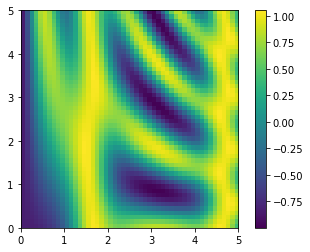

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

The result is a compelling visualization of the two-dimensional function.

# Comparisons, Masks, and Boolean Logic

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays.
Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.
In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

## Comparison Operators as ufuncs

In Computation on NumPy Arrays: Universal Functions we introduced ufuncs, and focused in particular on arithmetic operators. We saw that using ``+``, ``-``, ``*``, ``/``, and others on arrays leads to element-wise operations.
NumPy also implements comparison operators such as ``<`` (less than) and ``>`` (greater than) as element-wise ufuncs.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
print(x < 3)  # less than
y = x < 3
print(x.shape, y.shape)

[ True  True False False False]
(5,) (5,)


In [ ]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [ ]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [ ]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [ ]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [ ]:
x == 3  # equal

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [ ]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape.
Here is a two-dimensional example:

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [ ]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [ ]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [ ]:
# how many values less than 6?
print(x < 6)
print(np.count_nonzero(x < 6))  # True = 1, False = 0

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]
8


We see that there are eight array entries that are less than 6.
Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [ ]:
np.sum(x < 6)

8

The benefit of ``sum()`` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) ``np.any`` or ``np.all``:

In [ ]:
# are there any values greater than 8?
np.any(x > 8)

True

In [ ]:
# are there any values less than zero?
np.any(x < 0)

False

In [ ]:
# are all values less than 10?
np.all(x < 10)

True

In [ ]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

Here all the elements in the first and third rows are less than 8, while this is not the case for the second row.

Finally, a quick warning: as mentioned in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb), Python has built-in ``sum()``, ``any()``, and ``all()`` functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using ``np.sum()``, ``np.any()``, and ``np.all()`` for these examples!

### Boolean operators

We've already seen how we might count, say, all values less than 8.
But what if we want to know about all values less than 4 and greater than 1?
This is accomplished through Python's *bitwise logic operators*, ``&``, ``|``, ``^``, and ``~``.
Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [ ]:
print(x)
print(np.sum((x > 1) & (x < 4)))

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
4


Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

## Boolean Arrays as Masks

In the preceding section we looked at aggregates computed directly on Boolean arrays.
A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves.
Returning to our ``x`` array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [ ]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [ ]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to *select* these values from the array, we can simply index on this Boolean array; this is known as a *masking* operation:

In [ ]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is ``True``.


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer many questions for our dataset.

---------------------------------

# Assignment (Diabetes Dataset)
**PIMA Indian Diabetes dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. All patients here are females at least 21 years old of Pima Indian heritage.
The datasets consists of several medical predictor variables for the outcome and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The outcome is whether a person has diabetes or not.

*Acknowledgements*  
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Importing local files into Google Colab**  
Run the cell below and then browse through your local file system and select the diabetes_mod.csv file. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_mod.csv to diabetes_mod.csv


In [ ]:
import pandas as pd
pima = pd.read_csv("diabetes_mod.csv")

In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             764 non-null    float64
 3   SkinThickness             736 non-null    object 
 4   Insulin                   733 non-null    object 
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 54.1+ KB


In [ ]:
import numpy as np
data = np.asarray(pima.drop('Outcome',1)) # converting everything in the dataframe into a numpy array
print(data.shape)
print(data)

(768, 8)
[[6 148 72.0 ... 33.6 0.627 50]
 [1 85 66.0 ... 26.6 0.35100000000000003 31]
 [8 183 64.0 ... 23.3 0.672 32]
 ...
 [5 121 72.0 ... 26.2 0.245 30]
 [1 126 60.0 ... 30.1 0.349 47]
 [1 93 70.0 ... 30.4 0.315 23]]


In [ ]:
print(data.shape)

(768, 8)


1. **Correlation Coeff**: Compute the correlation value between the Pregnancies and Age columns.




In [ ]:
# Solution 1
np.corrcoef(data[:, 0], data[:, 7])[0,1]

0.5443412284023394

2. **Normalize the data:** Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we’ll be looking at the model weights. We’ll normalize the data such that each variable has 0 mean and standard deviation of 1.

In [ ]:
# Solution 2 # Data Standardization
means = np.nanmean(data, axis=0)
stds = np.nanstd(data, axis=0)
normalized_data = (data - means) / stds

3. **Nan removal**: Select the rows of the `data` that do not have any `nan` value, and store those in a new numpy array called `non_empty`

In [ ]:
# Solution 3

any_nan_in_row = np.array([~np.any(np.isnan(row)) for row in data])
non_empty = data[any_nan_in_row]
print(non_empty.shape)

(717, 8)


In [ ]:
non_empty = data[np.all(np.isfinite(data), axis=1), :]
non_empty.shape


(717, 8)

In [ ]:
non_empty = data[~np.isnan(data).any(axis=1),]
print(non_empty.shape)

(717, 8)


# Assignment (Image Processing)


##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit. (You will learn it in the visualization chapter)









In [ ]:
import numpy as np
import cv2 as cv 
from google.colab.patches import cv2_imshow   # for image display
from skimage import io
from PIL import Image 

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

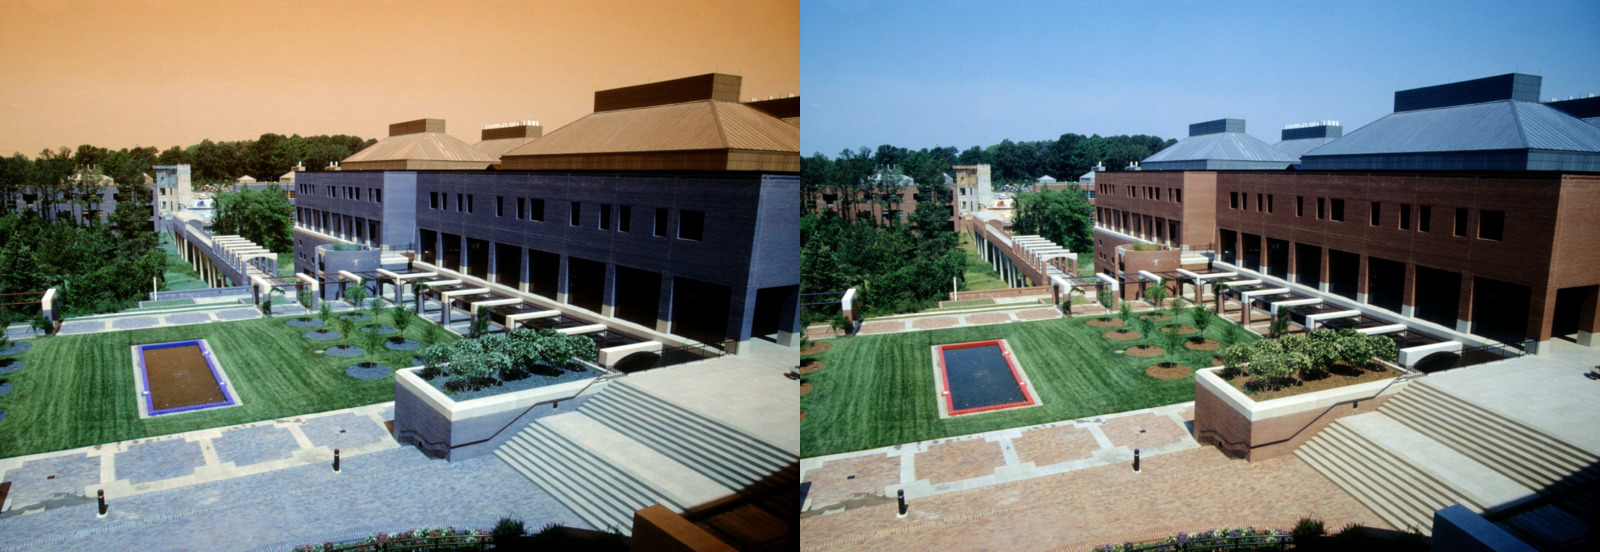

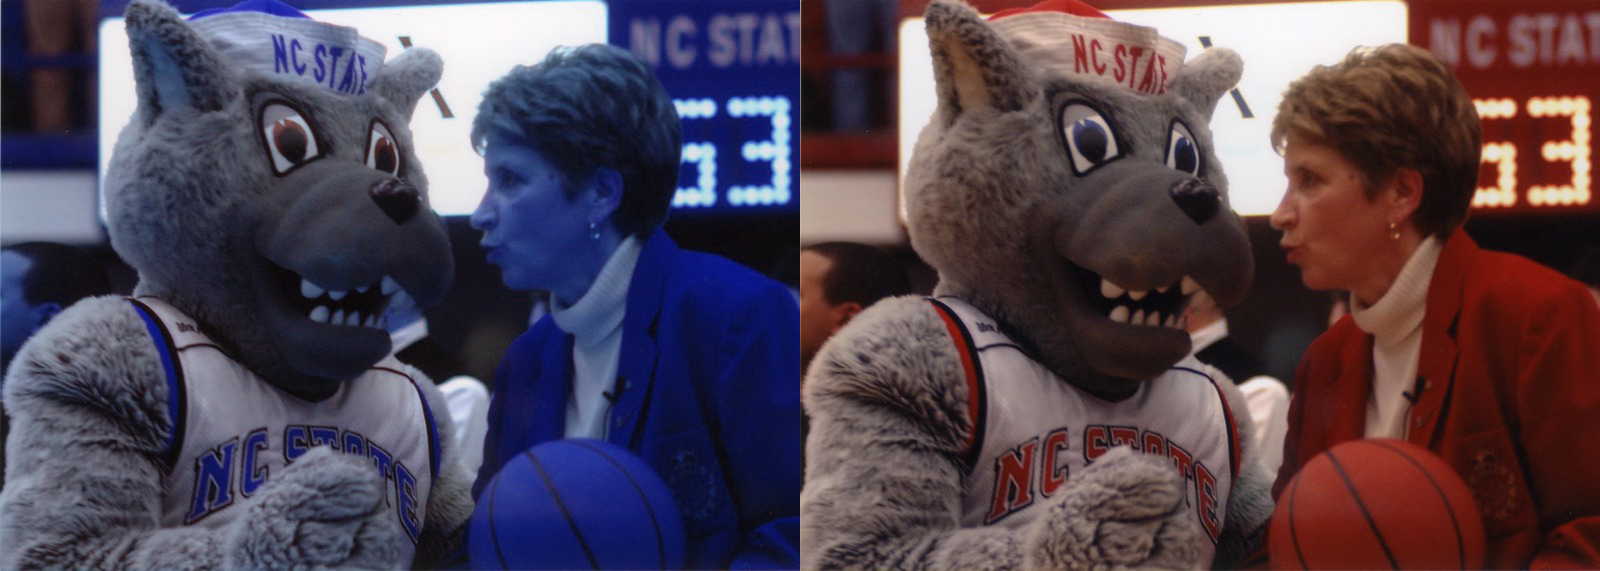

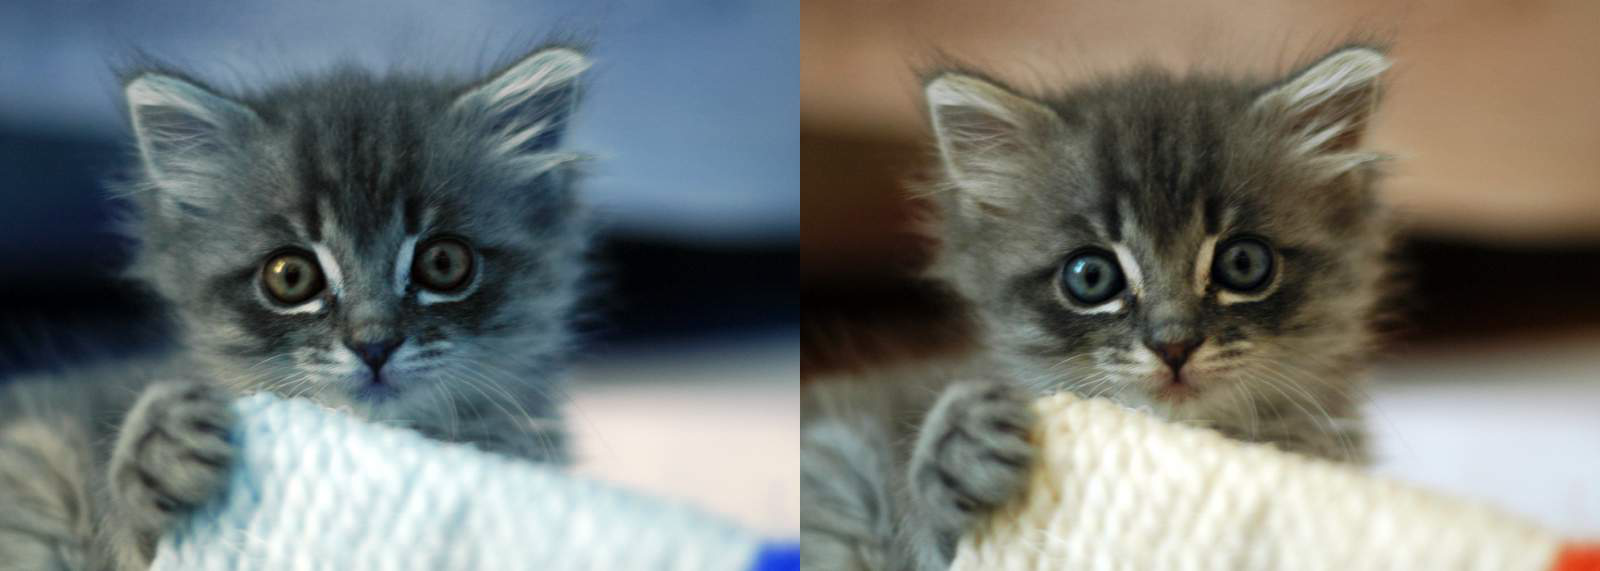

In [ ]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

(300, 500, 3)


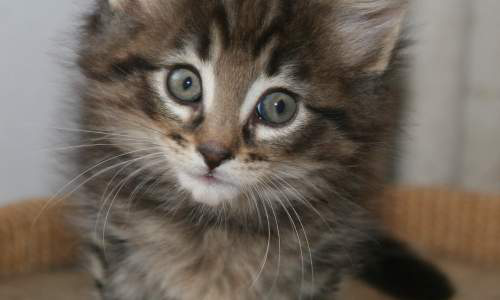

In [ ]:
## TODO: LOAD IMAGE
url = "https://placekitten.com/500/300"
myImg = io.imread(url)  
print(myImg.shape)  # it's a numpy array 3 is the color channels (R,G,B)
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Step3: Image Contours


In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


(571, 800)


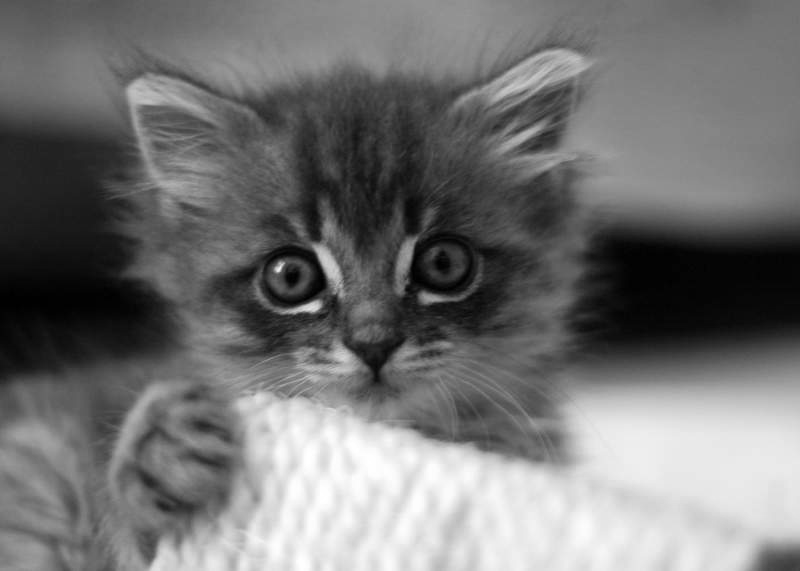

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
print(gray_image.shape)  # the channels dimension is gone, because in gray you only have one channel
cv2_imshow(gray_image)

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


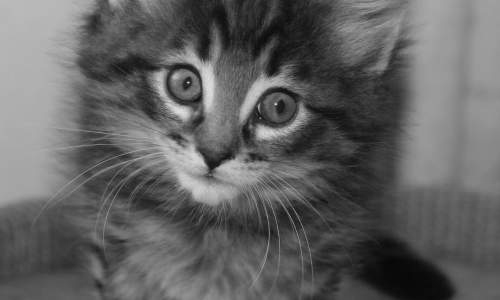

In [ ]:
myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv2_imshow(myGrayImg)

##Step3: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

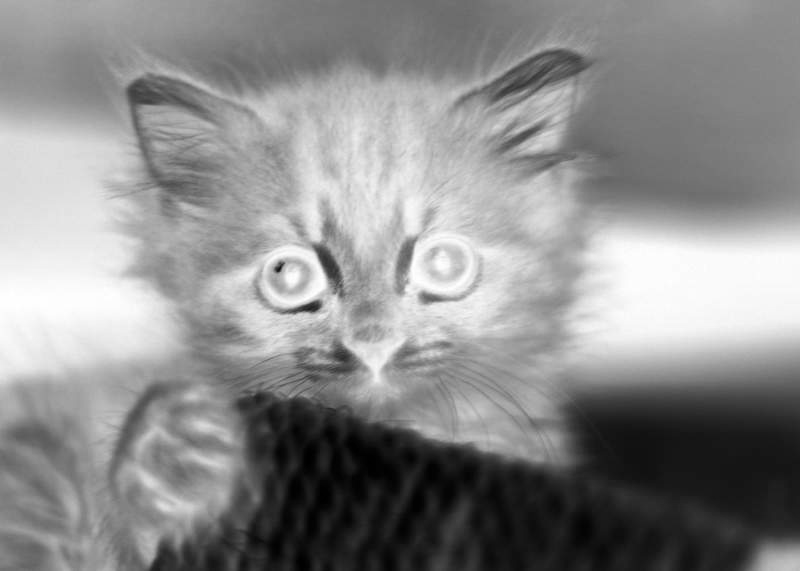

In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

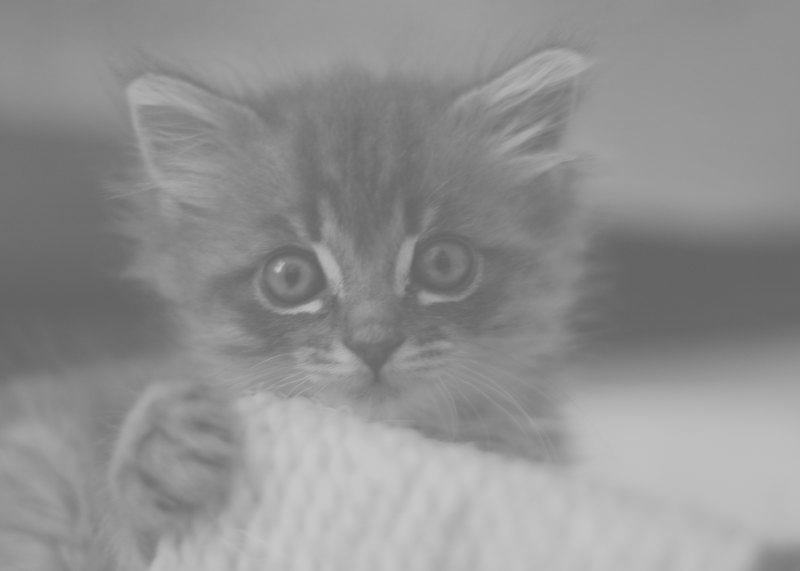

In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

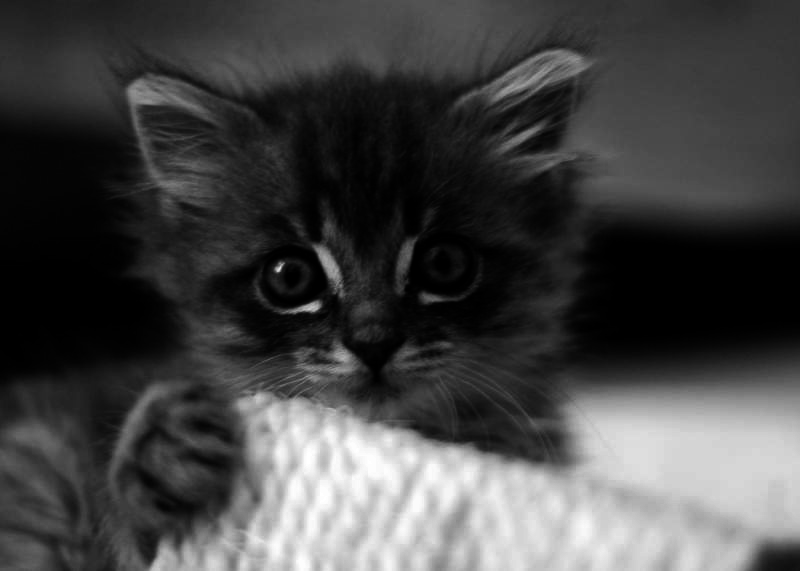

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

#### TODO #3:  Try some mathematical operations on your image


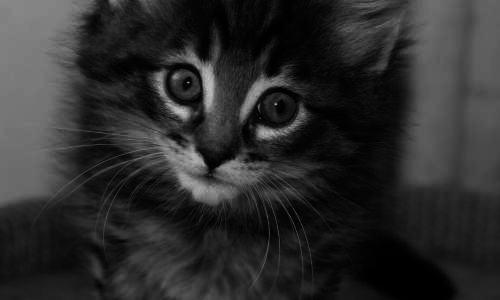

In [ ]:
## Implement your code here
myGrayImgTrans = 255.0*(myGrayImg/255.0)**2 
cv2_imshow(myGrayImgTrans)

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

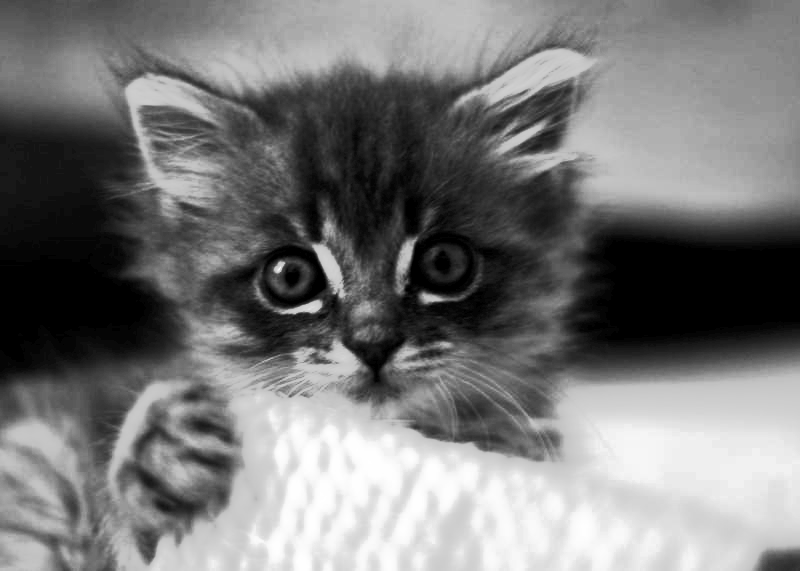

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

#### TODO # 4: Do a histogram equalization on your grayscale image



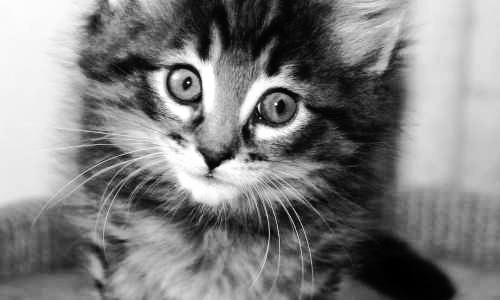

In [ ]:
## TODO: IMPLEMENT YOUR CODE HERE
myGrayImgeq = histeq(myGrayImg)
cv2_imshow(myGrayImgeq)

## Step5: Finding Edges by Highpass Filtering in FFT

This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

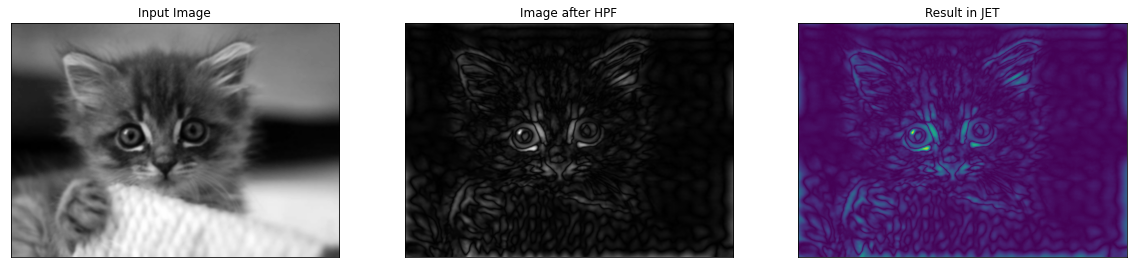

In [ ]:
import matplotlib.pylab as plt
imBlur = cv.blur(gray_image,(5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

---------------------------------
# References: 
Forked from [Parallel Machine Learning with scikit-learn and IPython](https://github.com/ogrisel/parallel_ml_tutorial) by Olivier Grisel


The source of this notebook is located at https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb

This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!